# 数据挖掘
## 第三周
## 任务一：Movies Dataset from Pirated Sites
李昊霖
1120201269

# 一、数据摘要和可视化

## 1.1数据预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据集路径
datadir = "movies_dataset.csv"

# 读取数据
df = pd.read_csv(datadir, index_col=0)

In [3]:
# 去除重复的数据
# 按照id属性进行观察
count_id = df['id'].value_counts()
count_id

372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: id, Length: 17086, dtype: int64

In [4]:
# 分析之后，是同一个电影的数据多次添加来的，所以只需要保存最后一次的数据就行
data = df.drop_duplicates(subset='id', keep='last', inplace=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17086 entries, 1 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      16609 non-null  float64
 1   appropriate_for  9809 non-null   object 
 2   director         15520 non-null  object 
 3   downloads        17085 non-null  object 
 4   id               17086 non-null  int64  
 5   industry         17085 non-null  object 
 6   language         16552 non-null  object 
 7   posted_date      17085 non-null  object 
 8   release_date     17085 non-null  object 
 9   run_time         16086 non-null  object 
 10  storyline        15764 non-null  object 
 11  title            17085 non-null  object 
 12  views            17085 non-null  object 
 13  writer           15266 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.0+ MB


## 1.2数据摘要

- 标称属性

该数据集的标称属性包括：appropriate_for, director, industry, language, writer  

接下来对其中的每一个属性进行分析

In [5]:
# appropriate_for
appropriate_for_data = data["appropriate_for"].value_counts()
appropriate_for_data

R                 3752
Not Rated         2132
PG-13             1763
PG                 884
TV-MA              406
TV-14              293
G                  140
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               44
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64

In [6]:
# director
director_for_data = data["director"].value_counts()
director_for_data

David Dhawan                   32
Ram Gopal Varma                27
Vikram Bhatt                   25
Steven Spielberg               24
Priyadarshan                   22
                               ..
Sujeeth                         1
Shonali Bose                    1
Thurop Van Orman, John Rice     1
David Guy Levy                  1
Bimal Roy                       1
Name: director, Length: 9672, dtype: int64

In [7]:
# industry
industry_for_data = data["industry"].value_counts()
industry_for_data

Hollywood / English    12197
Bollywood / Indian      2420
Anime / Kids            1028
Tollywood                769
Punjabi                  331
Stage shows              124
Pakistani                 92
Wrestling                 78
Dub / Dual Audio          45
3D Movies                  1
Name: industry, dtype: int64

In [8]:
# language
language_for_data = data["language"].value_counts()
language_for_data

English                                    10052
Hindi                                       1938
English,Spanish                              388
Punjabi                                      309
Telugu                                       297
                                           ...  
English,Spanish,Armenian                       1
Bosnian,English,Croatian,German,Serbian        1
English,Korean,Spanish                         1
Norwegian,Swedish                              1
Spanish,German,English                         1
Name: language, Length: 1168, dtype: int64

In [9]:
# writer
writer_for_data = data["writer"].value_counts()
writer_for_data

Andrew Jones                                                   11
Dheeraj Rattan                                                 11
Naresh Kathuria                                                11
Jagdeep Singh                                                  10
Justin Lee                                                     10
                                                               ..
Paul Flannery, David Ryan Keith                                 1
Anil Ravipudi, G. Adi Narayana, Narra Praveen                   1
Raj Kumar Gupta                                                 1
Camille Thomasson                                               1
Rajinder Singh Bedi, Saratchandra Chatterjee, Nabendu Ghosh     1
Name: writer, Length: 13603, dtype: int64

- 数值属性

要给出5数概括以及缺失值的个数

属性为IMDb-rating, downloads, run_time, views

In [10]:
# IMDb-rating
print(data["IMDb-rating"].describe())
print(f"缺失值的个数： {data['IMDb-rating'].isnull().sum()}")

count    16609.000000
mean         5.596442
std          1.281091
min          1.100000
25%          4.700000
50%          5.700000
75%          6.500000
max          9.900000
Name: IMDb-rating, dtype: float64
缺失值的个数： 477


In [11]:
# downloads
downloads_data = data['downloads'].str.replace(',', '').astype(float)
print(downloads_data.describe())
print(f"缺失值的个数： {downloads_data.isnull().sum()}")

count     17085.000000
mean      12575.807609
std       25542.926019
min           0.000000
25%        1287.000000
50%        3757.000000
75%       12224.000000
max      391272.000000
Name: downloads, dtype: float64
缺失值的个数： 1


In [12]:
# views
view_data = data['views'].str.replace(',', '').astype(float)
print(view_data.describe())
print(f"缺失值的个数： {view_data.isnull().sum()}")

count    1.708500e+04
mean     4.105073e+04
std      6.704179e+04
min      6.670000e+02
25%      9.899000e+03
50%      1.920700e+04
75%      4.370000e+04
max      1.638533e+06
Name: views, dtype: float64
缺失值的个数： 1


- 数据可视化

<AxesSubplot: ylabel='Frequency'>

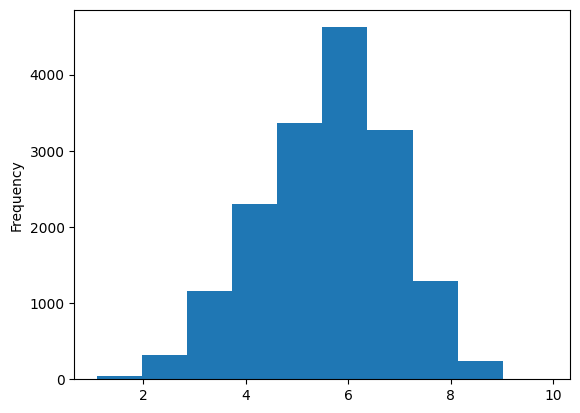

In [14]:
# IMDb-rating 直方图
data['IMDb-rating'].plot(kind='hist')

<AxesSubplot: >

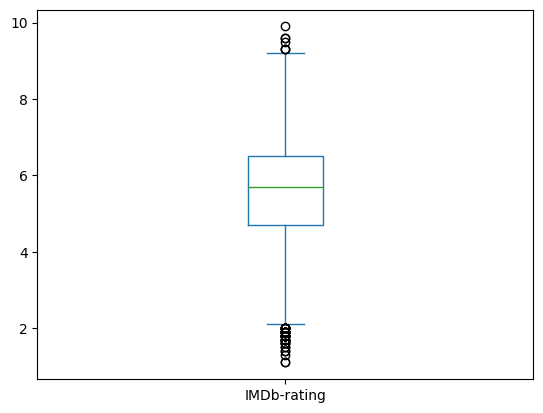

In [15]:
# IMDb-rating 盒图
data['IMDb-rating'].plot(kind='box')

<AxesSubplot: ylabel='Frequency'>

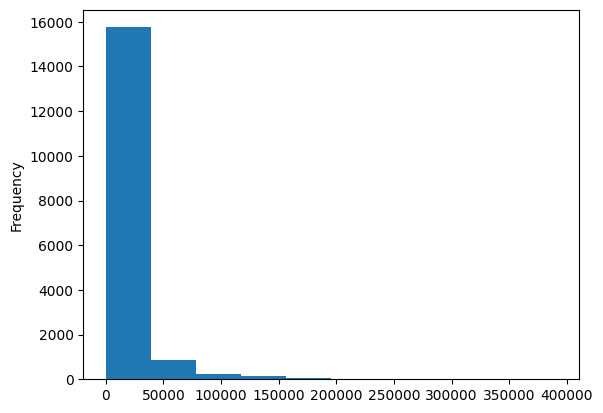

In [17]:
downloads_data.plot(kind="hist")

<AxesSubplot: >

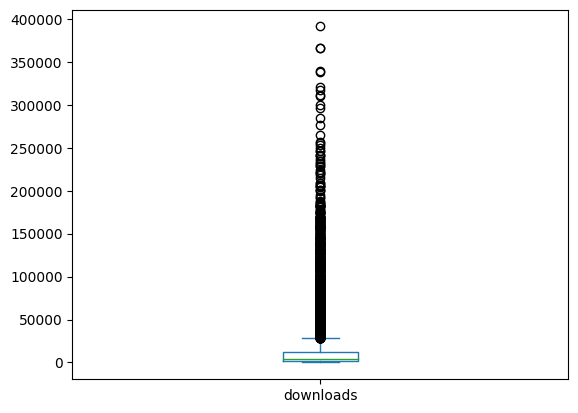

In [18]:
downloads_data.plot(kind="box")

<AxesSubplot: ylabel='Frequency'>

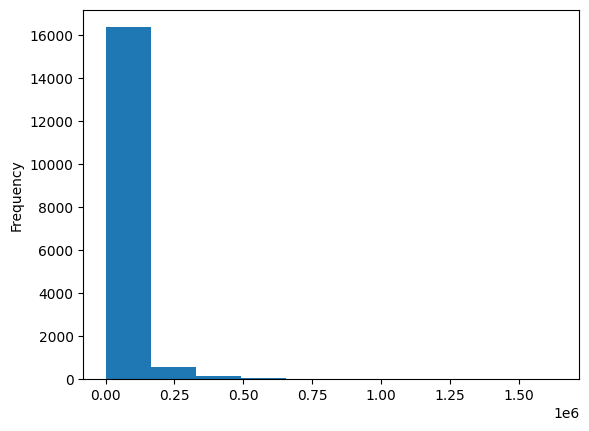

In [19]:
view_data.plot(kind='hist')

<AxesSubplot: >

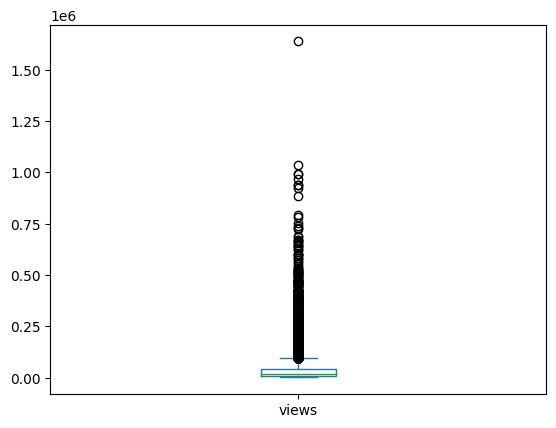

In [20]:
view_data.plot(kind='box')

## 数据缺失的处理

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17086 entries, 1 to 20547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      16609 non-null  float64
 1   appropriate_for  9809 non-null   object 
 2   director         15520 non-null  object 
 3   downloads        17085 non-null  object 
 4   id               17086 non-null  int64  
 5   industry         17085 non-null  object 
 6   language         16552 non-null  object 
 7   posted_date      17085 non-null  object 
 8   release_date     17085 non-null  object 
 9   run_time         16086 non-null  object 
 10  storyline        15764 non-null  object 
 11  title            17085 non-null  object 
 12  views            17085 non-null  object 
 13  writer           15266 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.0+ MB


In [23]:
data.isnull().sum()

IMDb-rating         477
appropriate_for    7277
director           1566
downloads             1
id                    0
industry              1
language            534
posted_date           1
release_date          1
run_time           1000
storyline          1322
title                 1
views                 1
writer             1820
dtype: int64

对数据进行分析，appropriate_for是年龄限制

这个需要对具体的电影具体分析，不太能通过相关关系和数据对象之间的相似性补充

更不能使用最高频率值填充

因此直接剔除

In [24]:
data_de = data.dropna(subset=['appropriate_for'])
data_de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9809 entries, 1 to 20540
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      9797 non-null   float64
 1   appropriate_for  9809 non-null   object 
 2   director         9346 non-null   object 
 3   downloads        9809 non-null   object 
 4   id               9809 non-null   int64  
 5   industry         9809 non-null   object 
 6   language         9737 non-null   object 
 7   posted_date      9809 non-null   object 
 8   release_date     9809 non-null   object 
 9   run_time         9703 non-null   object 
 10  storyline        9269 non-null   object 
 11  title            9809 non-null   object 
 12  views            9809 non-null   object 
 13  writer           9280 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.1+ MB


In [25]:
data_de.isnull().sum()

IMDb-rating         12
appropriate_for      0
director           463
downloads            0
id                   0
industry             0
language            72
posted_date          0
release_date         0
run_time           106
storyline          540
title                0
views                0
writer             529
dtype: int64

可以发现，其他的缺少值少了很多，但是director, run_time, storyline还有较多的缺少